In [ ]:
#Import Library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')





In [ ]:
#Load Data
customer = pd.read_csv('Case Study - Customer.csv', delimiter=';')
product = pd.read_csv('Case Study - Product.csv', delimiter=';')
store = pd.read_csv('Case Study - Store.csv', delimiter=';')
transaction = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

In [ ]:
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [ ]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


##**Data Preprocessing**

###1. Cek missing value

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


Terdapat missing value pada variabel Marital Status sebanyak 3. Lalu untuk menganganinya, dilakukan penghapusan data yang terdapat missing value seperti dibawah.

In [ ]:
customer.dropna(subset=["Marital Status"], inplace=True)

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      444 non-null    int64 
 1   Age             444 non-null    int64 
 2   Gender          444 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          444 non-null    object
dtypes: int64(3), object(2)
memory usage: 20.8+ KB


kemudian dilakukan pengecekan missing value kembali, dan didapatkan sudah tidak terdapat missing value.

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


Tidak terdapat Missing value pada dataset product.

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


Tidak terdapat Missing value pada dataset store.

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


Tidak terdapat Missing value pada dataset transaction.

###2. Duplikasi data

In [ ]:
dc = customer[customer.duplicated()]
print('customer:',dc)

dp = product[product.duplicated()]
print('product:',dp)

ds = store[store.duplicated()]
print('store:',ds)

dt = transaction[transaction.duplicated()]
print('transaksi:',dt)

customer: Empty DataFrame
Columns: [CustomerID, Age, Gender, Marital Status, Income]
Index: []
product: Empty DataFrame
Columns: [ProductID, Product Name, Price]
Index: []
store: Empty DataFrame
Columns: [StoreID, StoreName, GroupStore, Type, Latitude, Longitude]
Index: []
transaksi: Empty DataFrame
Columns: [TransactionID, CustomerID, Date, ProductID, Price, Qty, TotalAmount, StoreID]
Index: []


Tidak terdapat duplikat data

### 3. Mengubah tipe data

In [ ]:
customer['Income']= customer['Income'].replace('[,]','.', regex= True).astype('float')

In [ ]:
store['Latitude']= store['Latitude'].replace('[,]','.', regex= True).astype('float')
store['Longitude']= store['Longitude'].replace('[,]','.', regex= True).astype('float')

In [ ]:
transaction['Date']=pd.to_datetime(transaction['Date'])

### 4. Menggabungkan Data

In [ ]:
gabung = pd.merge(transaction, customer, on="CustomerID")
gabung = pd.merge(gabung, product, on="ProductID")
gabung = pd.merge(gabung, store, on="StoreID")

In [ ]:
gabung.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


##**Membuat Model**

### 1. Regresi Time Series

In [ ]:
#Menggabungkan Data
df_regresi = gabung.groupby(['Date']).agg({
    'Qty':'sum'
}).reset_index()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

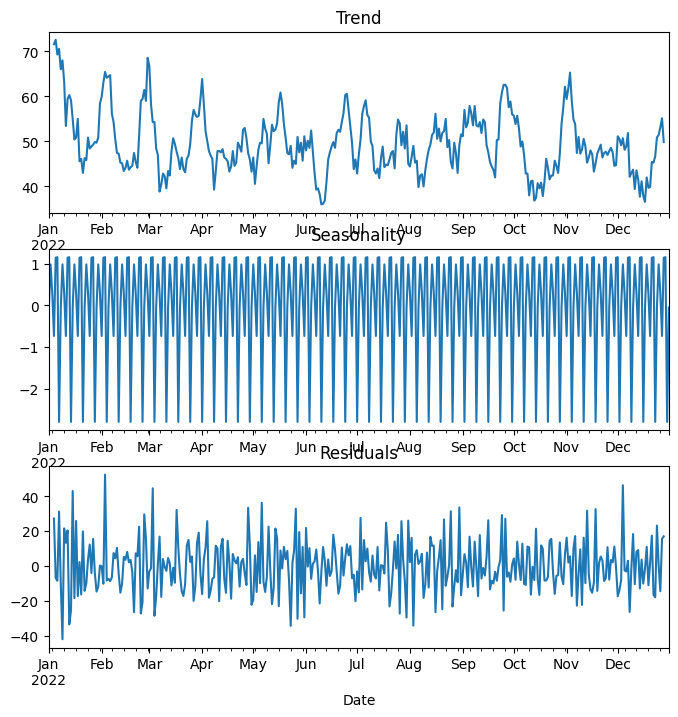

In [ ]:
#Melakukan dekomposisi untuk melihat trend
dekomposisi = seasonal_decompose(df_regresi.set_index('Date'))

plt.figure(figsize=(8,8))

plt.subplot(311)
dekomposisi.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
dekomposisi.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
dekomposisi.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout

In [ ]:
#Membagi data menjadi data test dan data train
cut_off = round(df_regresi.shape[0]*0.9)
df_train = df_regresi[:cut_off]
df_test = df_regresi[cut_off:].reset_index(drop=True)
df_train.shape,df_test.shape

((328, 2), (37, 2))

In [ ]:
df_train

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
323,2022-11-20,51
324,2022-11-21,55
325,2022-11-22,49
326,2022-11-23,40


In [ ]:
df_test

,Date,Qty
0,2022-11-25,55
1,2022-11-26,40
2,2022-11-27,53
3,2022-11-28,50
4,2022-11-29,55
5,2022-11-30,45
6,2022-12-01,35
7,2022-12-02,34
8,2022-12-03,41
9,2022-12-04,98


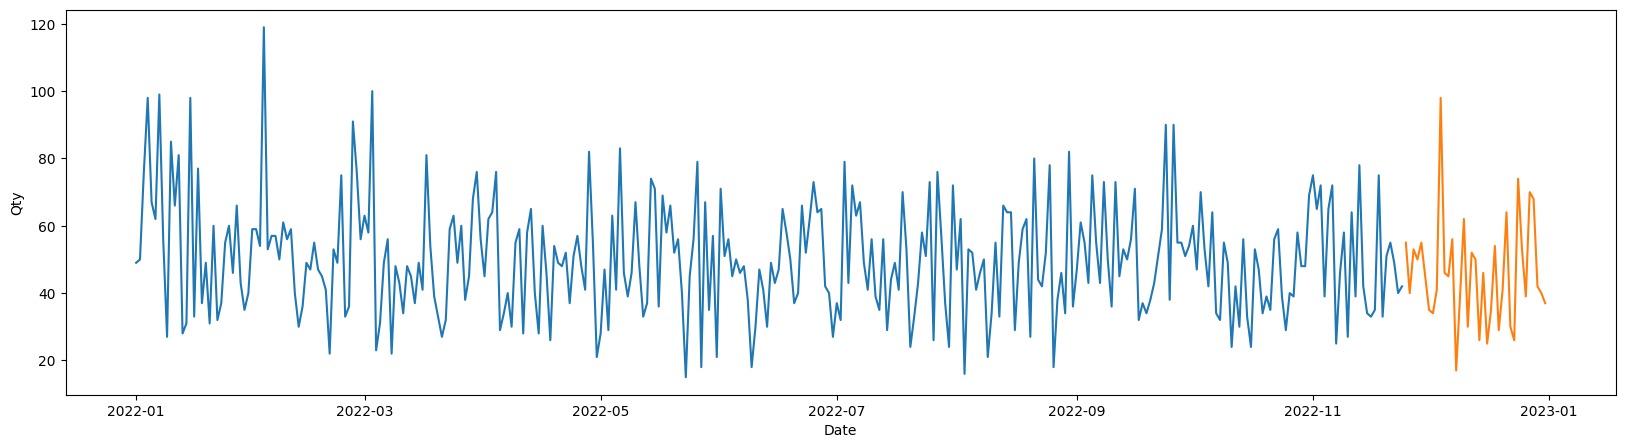

In [ ]:
#visualisasi dari split data
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'],y=df_train['Qty']);
sns.lineplot(data=df_test, x=df_test['Date'],y=df_test['Qty']);

### Membuat model ARIMA


In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(y_actual, y_pred):
    """
    Function to calculate RMSE
    """
    rmse_value = mean_squared_error(y_actual, y_pred) ** 0.5
    print(f'RMSE value: {rmse_value}')


In [ ]:
def eval(y_actual, y_pred):
  """
  function to eval machine learning modeling
  """
  rmse_value = mean_absolute_error(y_actual,y_pred)
  print(f'MAE value:{rmse_value}')

MAE value:11.950123813820776
RMSE value: 15.922260253436642


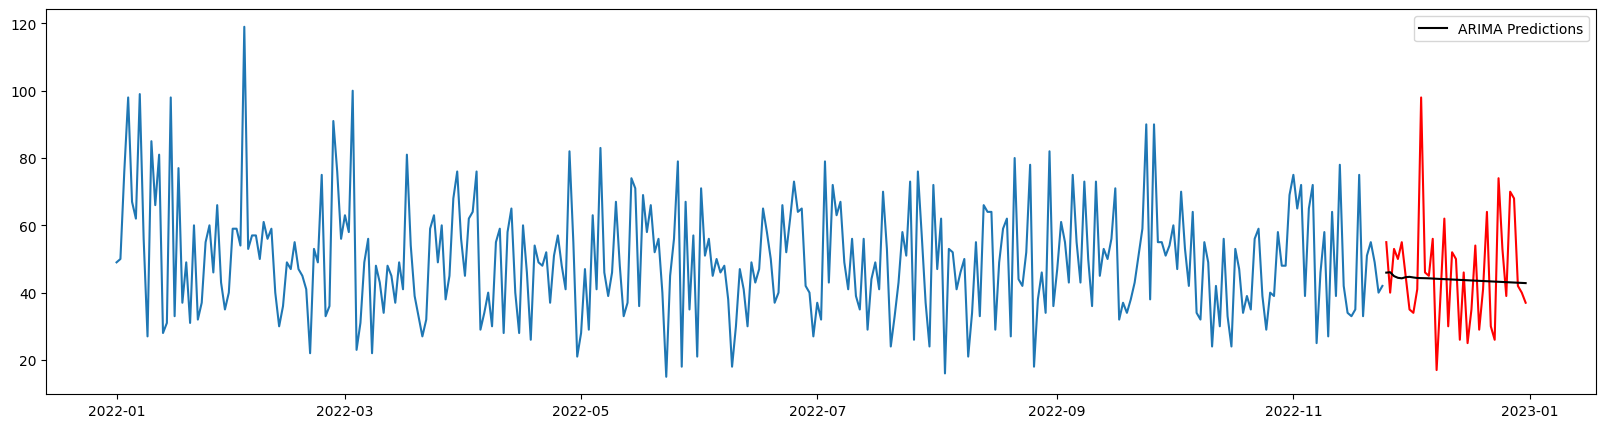

In [ ]:
from re import A
#model arima
df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

y = df_train['Qty']

ARIMAmodel = ARIMA(y,order=(5,2,1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(df_test))

y_pred_df= y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start = y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index=df_test.index
y_pred_out = y_pred_df['predictions']
eval(df_test['Qty'],y_pred_out)
rmse(df_test['Qty'], y_pred_out)


plt.figure(figsize=(20,5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black', label='ARIMA Predictions')
plt.legend()

Diatas adalah visualisasi dari Model ARIMA yang telah dibuat. Terlihat bahwa line yang berwarna hitam menggambarkan prediksinya.
Model ini juga dievaluasi dan diperoleh skor MAE sebesar 11.95 serta RMSE sebesar 15.92

###2. Clustering Segmentasi Pelanggan

In [ ]:
#Overview data
gabung.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [ ]:
#Pengecekan korelasi
gabung.corr()

,CustomerID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Income,Price_y,Latitude,Longitude
CustomerID,1.000000,-0.014821,-0.012024,-0.025266,0.005470,-0.021120,-0.015863,0.005440,-0.014821,0.005166,-0.004492
Price_x,-0.014821,1.000000,-0.354614,0.440046,-0.031782,0.013781,0.012132,0.000636,1.000000,-0.027438,0.017238
Qty,-0.012024,-0.354614,1.000000,0.620804,0.012169,-0.026745,-0.011920,-0.027724,-0.354614,-0.007179,0.006805
TotalAmount,-0.025266,0.440046,0.620804,1.000000,-0.011283,-0.016458,-0.009479,-0.024816,0.440046,-0.030704,0.026535
StoreID,0.005470,-0.031782,0.012169,-0.011283,1.000000,-0.004783,0.000449,0.000739,-0.031782,0.471039,-0.095710
Age,-0.021120,0.013781,-0.026745,-0.016458,-0.004783,1.000000,-0.026879,0.485532,0.013781,0.009474,0.015670
Gender,-0.015863,0.012132,-0.011920,-0.009479,0.000449,-0.026879,1.000000,-0.067612,0.012132,-0.006624,-0.001018
Income,0.005440,0.000636,-0.027724,-0.024816,0.000739,0.485532,-0.067612,1.000000,0.000636,0.016401,0.003471
Price_y,-0.014821,1.000000,-0.354614,0.440046,-0.031782,0.013781,0.012132,0.000636,1.000000,-0.027438,0.017238
Latitude,0.005166,-0.027438,-0.007179,-0.030704,0.471039,0.009474,-0.006624,0.016401,-0.027438,1.000000,-0.396128


In [ ]:
#Melakukan Fiture Selection
df_cluster = gabung.groupby(['CustomerID']).agg({
    'TransactionID':'count',
    'Qty':'sum'
}).reset_index()

In [ ]:
df_cluster.head()

,CustomerID,TransactionID,Qty
0,1,17,60
1,2,13,57
2,3,15,56
3,4,10,46
4,5,7,27


dilakukan viture selection dan variabel yang dipilih untuk digunakan yakni CustomerID, TransactionID, Qty.

In [ ]:
#Normalisasi
import numpy as np
from sklearn import preprocessing

data = df_cluster.drop(columns=['CustomerID'])
data_norm = preprocessing.normalize(data)

In [ ]:
data_norm

array([[0.27260257, 0.96212673],
       [0.22236034, 0.97496455],
       [0.25873609, 0.96594805],
       [0.21242964, 0.97717636],
       [0.25096216, 0.9679969 ],
       [0.2216211 , 0.97513286],
       [0.28580512, 0.95828776],
       [0.28547659, 0.95838568],
       [0.2216211 , 0.97513286],
       [0.24253563, 0.9701425 ],
       [0.25371269, 0.96727962],
       [0.26910454, 0.96311097],
       [0.32432432, 0.94594595],
       [0.26311741, 0.96476382],
       [0.25163385, 0.96782251],
       [0.25912857, 0.96584284],
       [0.30320366, 0.95292578],
       [0.23162053, 0.97280621],
       [0.27232247, 0.96220605],
       [0.27472113, 0.96152395],
       [0.26879897, 0.9631963 ],
       [0.26311741, 0.96476382],
       [0.29568373, 0.95528589],
       [0.28734789, 0.95782629],
       [0.30782029, 0.95144452],
       [0.29827499, 0.95447998],
       [0.28216632, 0.9593655 ],
       [0.23162053, 0.97280621],
       [0.24253563, 0.9701425 ],
       [0.31622777, 0.9486833 ],
       [0.

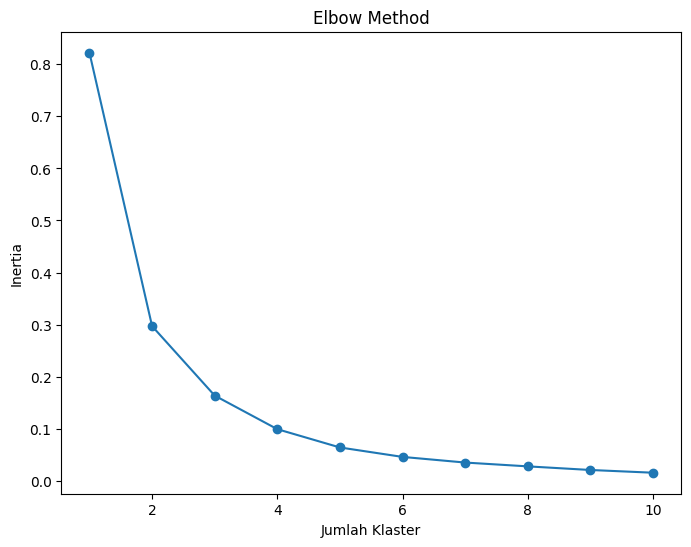

In [ ]:
#Menentukan nilai K yang optimum dengan metode Elbow
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_norm)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Dari visualisasi diatas, didapatkan nilai K yang ideal yakni 5.

In [ ]:
#Melakukan pemodelan cluster
fits[3]

KMeans(n_clusters=5, n_init='auto', random_state=0)

In [ ]:
data['cluster_label'] = fits[3].labels_

In [ ]:
data.groupby(['cluster_label']).agg({
    'TransactionID':'count',
    'TransactionID':'mean',
    'Qty':'sum'
})

,TransactionID,Qty
cluster_label,,
0,10.227273,5852
1,11.860927,6629
2,11.296296,1745
3,9.200000,215
4,11.680412,3684


Dari kelima cluster yang terbentuk yaitu ada cluster 0,1,2,3, dan 4. Terlihat cluster 1 memiliki quantyty tertinggi.